## Gaussian decomposable graphical model

Fitting a Gaussian decomposable graphical model to an auto-regressive G. 

In [9]:
SAVE_PLOTS = False
SAVE_LOC =  ''

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import time
from scipy.interpolate import make_interp_spline
from parallelDG.graph import trajectory
import parallelDG.graph.graph as glib
import parallelDG.graph.decomposable as dlib
import parallelDG.distributions.g_intra_class as gic
import parallelDG.auxiliary_functions as aux
from parallelDG.distributions import discrete_dec_log_linear as loglin
import parallelDG.mh_parallel as pdg
from networkx.drawing.nx_pydot import graphviz_layout
sns.set_style("whitegrid")
options = {
    "font_size": 8,
    "node_size": 100,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
def save_location(filename, loc = SAVE_LOC):
    if SAVE_PLOTS:
        plt.savefig(loc + filename + '.png', dpi = 600, bbox_inches='tight')
    else: 
        plt.show()
    
def smooth(x, y):
    if not x: 
        x = list(range(len(y)))
    X_Y_Spline = make_interp_spline(x, y, k=3)
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = np.linspace(np.min(x), np.max(x), 500)
    Y_ = X_Y_Spline(X_)
    return X_, Y_

## Speed analysis

In [3]:
def run_model(p):
    sigma2 = 1.0
    rho = 0.9
    n = p
    delta = 5
    #seed = p
    #np.random.seed(p) # generates same data as in the paper
    ar_graph = dlib.sample_random_AR_graph(n_dim=p, max_bandwidth=delta)
    ar_cov_mat = gic.cov_matrix(ar_graph, rho, sigma2)
    ar_df = pd.DataFrame(np.random.multivariate_normal(np.zeros(p), ar_cov_mat, n))
    n_samples = 100000
    randomize  = 100
    graph_prior = ['uniform']
    tic = time.time()
    traj = pdg.sample_trajectory_ggm(dataframe=ar_df, 
                                     n_samples=n_samples,
                                     randomize=randomize, 
                                     graph_prior = graph_prior,
                                     delta = delta,
                                     singe_move = False)
    toc = time.time()
    print('Time taken {:.2f}sec'.format(toc-tic))
    traj_single = pdg.sample_trajectory_ggm(dataframe=ar_df, 
                                     n_samples=n_samples,
                                     randomize=randomize, 
                                     graph_prior = graph_prior,
                                     delta = delta, 
                                     single_move = True)
    return (p, 1000 * traj.time/traj.n_updates, 1000 * traj.time/n_samples, 1000 * traj_single.time/n_samples)

In [4]:
p_range = [10, 50, 100, 150, 200, 300, 500]
res = [run_model(p) for p in p_range]

Metropolis-Hastings - single-move:   1%|▏         | 1439/99999 [00:00<00:06, 14387.41it/s]

Total of 285982 updates, for an average of 2.86 per iteration or 31846.64updates/sec
Acceptance rate 0.9124
Time taken 8.98sec


Metropolis-Hastings - parallel moves:   0%|          | 264/99999 [00:00<00:38, 2615.99it/s]

Total of 100000 updates, for an average of 1.00 per iteration or 15288.63updates/sec
Acceptance rate 0.5654


Metropolis-Hastings - single-move:   1%|          | 621/99999 [00:00<00:16, 6208.07it/s]

Total of 255847 updates, for an average of 2.56 per iteration or 18397.59updates/sec
Acceptance rate 0.5078
Time taken 13.91sec


Metropolis-Hastings - parallel moves:   0%|          | 0/99999 [00:00<?, ?it/s]

Total of 100000 updates, for an average of 1.00 per iteration or 9234.06updates/sec
Acceptance rate 0.1551


Metropolis-Hastings - single-move:   0%|          | 352/99999 [00:00<00:28, 3519.06it/s]

Total of 265855 updates, for an average of 2.66 per iteration or 12779.82updates/sec
Acceptance rate 0.4870
Time taken 20.82sec


Metropolis-Hastings - parallel moves:   0%|          | 0/99999 [00:00<?, ?it/s]

Total of 100000 updates, for an average of 1.00 per iteration or 6394.29updates/sec
Acceptance rate 0.1475


Metropolis-Hastings - single-move:   0%|          | 200/99999 [00:00<00:54, 1846.99it/s]

Total of 283029 updates, for an average of 2.83 per iteration or 9600.97updates/sec
Acceptance rate 0.5015
Time taken 29.52sec


Metropolis-Hastings - single-move: 100%|██████████| 99999/99999 [00:28<00:00, 3484.38it/s]


Total of 100000 updates, for an average of 1.00 per iteration or 3483.65updates/sec
Acceptance rate 0.1400


Metropolis-Hastings - single-move:   0%|          | 100/99999 [00:00<01:41, 982.14it/s]

Total of 324795 updates, for an average of 3.25 per iteration or 7321.60updates/sec
Acceptance rate 0.4960
Time taken 44.41sec


Metropolis-Hastings - single-move: 100%|██████████| 99999/99999 [00:46<00:00, 2154.31it/s]


Total of 100000 updates, for an average of 1.00 per iteration or 2154.04updates/sec
Acceptance rate 0.1451


Metropolis-Hastings - single-move:   0%|          | 0/99999 [00:00<?, ?it/s]

Total of 309095 updates, for an average of 3.09 per iteration or 3858.79updates/sec
Acceptance rate 0.4661
Time taken 80.15sec


Metropolis-Hastings - single-move: 100%|██████████| 99999/99999 [01:31<00:00, 1089.82it/s]


Total of 100000 updates, for an average of 1.00 per iteration or 1089.75updates/sec
Acceptance rate 0.1407


Metropolis-Hastings - parallel moves: 100%|██████████| 99999/99999 [03:30<00:00, 474.63it/s] 


Total of 339844 updates, for an average of 3.40 per iteration or 1612.93updates/sec
Acceptance rate 0.4492
Time taken 210.91sec


Metropolis-Hastings - single-move: 100%|██████████| 99999/99999 [03:47<00:00, 440.45it/s]


Total of 100000 updates, for an average of 1.00 per iteration or 440.44updates/sec
Acceptance rate 0.1554


In [5]:
res

[(10, 0.03140049018862264, 0.08979974985122681, 0.06540810108184815),
 (50, 0.05435495462655306, 0.1390655207633972, 0.10829473972320557),
 (100, 0.07824838756719044, 0.20802725076675416, 0.1563895297050476),
 (150, 0.10415616724917524, 0.2947921586036682, 0.2870548486709595),
 (200, 0.1365822534090332, 0.4436123299598694, 0.4642444109916687),
 (300, 0.2591487696807204, 0.8010158896446228, 0.9176447010040283),
 (500, 0.6199886417746988, 2.1069941997528074, 2.270474810600281)]

In [6]:
df = pd.DataFrame(res, columns=['n', 'serial', 'parallel', 'single_move'])
df

,n,serial,parallel,single_move
0,10,0.031400,0.089800,0.065408
1,50,0.054355,0.139066,0.108295
2,100,0.078248,0.208027,0.156390
3,150,0.104156,0.294792,0.287055
4,200,0.136582,0.443612,0.464244
5,300,0.259149,0.801016,0.917645
6,500,0.619989,2.106994,2.270475


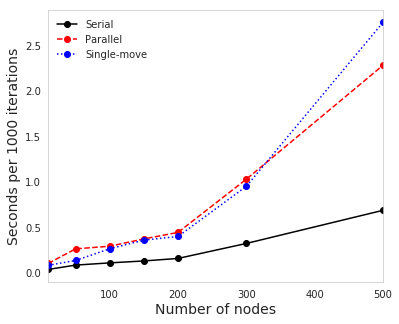

In [10]:
df.plot(x='n', 
        marker='o', 
        color=['black','red', 'blue' ], 
        style = ['-', '--', ':'], 
        figsize=(6,5))
plt.ylabel('Seconds per 1000 iterations', fontsize=14)
plt.xlabel('Number of nodes', fontsize=14)
plt.grid(False)
plt.legend(['Serial', 'Parallel', 'Single-move'],frameon=False)
#plt.savefig('', dpi = 600, bbox_inches='tight')
save_location('time_per_1000_updates')

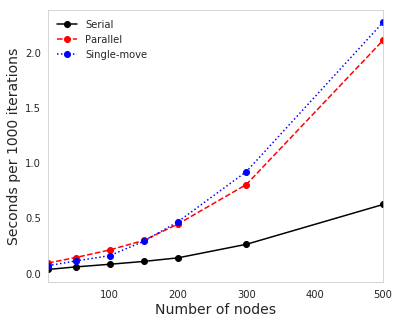

In [8]:
df.plot(x='n', 
        marker='o', 
        color=['black','red', 'blue' ], 
        style = ['-', '--', ':'], 
        figsize=(6,5))
plt.ylabel('Seconds per 1000 iterations', fontsize=14)
plt.xlabel('Number of nodes', fontsize=14)
plt.grid(False)
plt.legend(['Serial', 'Parallel', 'Single-move'],frameon=False)
#plt.savefig('', dpi = 600, bbox_inches='tight')
save_location('time_per_1000_updates')